In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

Below are the results from the set of simulations that we've run, with each of these averaged and stored in a list to compare versus the Clifford sequence length.

In [46]:
L_0 = [0.995, 0.999, 1.0, 0.998, 1.0, 1.0, 0.997, 0.997, 1.0, 0.999]
L_5 = [0.99, 0.976, 0.988, 0.964, 0.971, 0.981, 0.988, 0.99, 0.987, 0.993]
L_10 = [0.967, 0.983, 0.975, 0.944, 0.97, 0.959, 0.955, 0.954, 0.963, 0.973]
L_20 = [0.87, 0.867, 0.865, 0.887, 0.872, 0.878, 0.881, 0.888, 0.866, 0.876]
L_30 = [0.643, 0.755, 0.681, 0.768, 0.805, 0.856, 0.865, 0.632, 0.719, 0.621]
L_40 = [0.709, 0.755, 0.744, 0.686, 0.631, 0.763, 0.617, 0.572, 0.573, 0.777]
L_50 = [0.888, 0.77, 0.759, 0.77, 0.671, 0.611, 0.636, 0.703, 0.869, 0.861]
L_75 = [0.537, 0.499, 0.567, 0.503, 0.79, 0.463, 0.736, 0.735, 0.766, 0.523]

res_list = [np.mean(L_0),
np.mean(L_5),
np.mean(L_10),
np.mean(L_20),
#np.mean(L_30),
np.mean(L_50),
np.mean(L_75)]
L_list = [0,5,10,20,50,75]

Now, we begin to actually apply our fit. We've done this in two different batches; the first listed removes an outlier measurement at $L=30$, while the second leaves it included. In both cases, we get gate fidelities that are >95%, but the one including the outlier is only at 96% gate fidelity, while the first is at 99.87% fidelity. One thing to consider as well is the constraints that we would expect on $m$ and $b$, in both cases the sum is very near 1, but not exactly 1. Nevertheless, for the data we have currently, the gate fidelity with outliers removed matches well with the expected single qubit gate fidelities reported by IonQ. We need to have longer circuit runs to confirm the convergence of $\frac{1}{D}$, which we're currently awaiting results for.

In [47]:
def exp_function(x,m,a,b):
    return m*np.exp(-a*x) + b

m:  7.515315255210861  -log(F):  0.00070612422007393  b:  -6.512079426978452


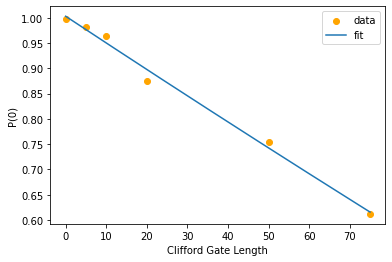

In [48]:
params = (0.0015,0.00087,0.9985)
params, cv = scipy.optimize.curve_fit(exp_function,L_list,res_list,params)

m,a,b = params
L_survey = np.linspace(0,75,1000)
plt.scatter(L_list,res_list,label="data",color='orange')
plt.plot(L_survey,exp_function(L_survey,m,a,b),label="fit")
plt.legend()
plt.xlabel("Clifford Gate Length")
plt.ylabel("P(0)")
print("m: ",m," -log(F): ",a," b: ",b)

In [53]:
res_list_2 = [np.mean(L_0),
np.mean(L_5),
np.mean(L_10),
np.mean(L_20),
np.mean(L_30),
np.mean(L_50),
np.mean(L_75)]
L_list_2 = [0,5,10,20,30,50,75]
print(len(res_list_2))

7


m:  0.5588916841901351  -log(F):  0.01620491167032361  b:  0.4584295732224515


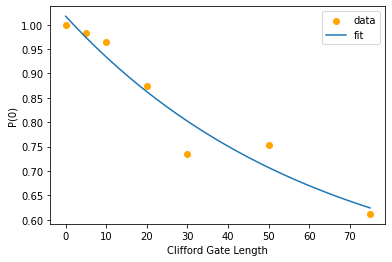

In [55]:
params = (0.0015,0.00087,0.9985)
params, cv = scipy.optimize.curve_fit(exp_function,L_list_2,res_list_2,params)

m,a,b = params
L_survey_2 = np.linspace(0,75,1000)
plt.scatter(L_list_2,res_list_2,label='data',color='orange')
plt.plot(L_survey_2,exp_function(L_survey_2,m,a,b),label='fit')
plt.legend()
plt.xlabel("Clifford Gate Length")
plt.ylabel("P(0)")
print("m: ",m," -log(F): ",a," b: ",b)